##  生成AIを副操縦士としたプログラミングのアシスト
####  データ分析のためにデータ生成する（確率分布，サンプリング）

- Bing Ai  COPILOTに質問してみましょう：

```
高校２年生の英語の成績分布をマルコフ連鎖モンテカルロ法でランダムサンプリング生成したいです．
ここでは，２つの正規分布が重なっていると仮定します．
一つは平均55点で分散7点，もう一つは平均75点分散4点と仮定します．
120名の学生の英語の成績分布を作成して，グラフ可視化するPythonコードを教えて下さい．
```

## 生成AIが作成したPythonコード例：

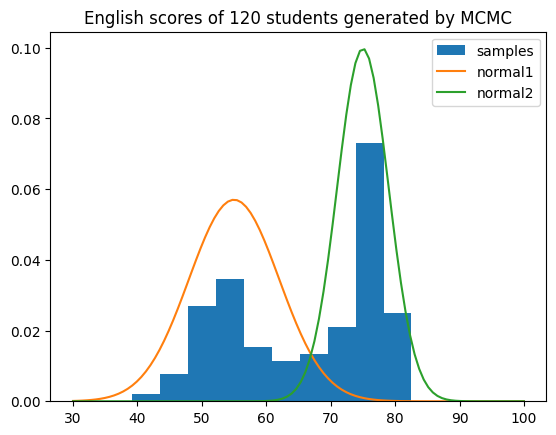

In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

# 乱数のシードを設定
np.random.seed(20240219)

# 正規分布のパラメータを設定
mu1 = 55 # 平均
sigma1 = 7 # 分散
mu2 = 75 # 平均
sigma2 = 4 # 分散

# マルコフ連鎖の初期値を設定
x0 = 55 # 初期値
n = 120 # サンプル数

# マルコフ連鎖の遷移確率を設定
p = 0.5 # どちらの正規分布からサンプリングするかの確率

# マルコフ連鎖のサンプリング
x = [x0] # サンプルのリスト
for i in range(n-1):
    # どちらの正規分布からサンプリングするかを決める
    if np.random.rand() < p:
        # 正規分布1からサンプリングする
        x_next = np.random.normal(mu1, sigma1)
    else:
        # 正規分布2からサンプリングする
        x_next = np.random.normal(mu2, sigma2)
    # サンプルのリストに追加する
    x.append(x_next)

# サンプルのヒストグラムを描画する
plt.hist(x, bins=10, density=True, label="samples")
# 正規分布の確率密度関数を描画する
x_range = np.linspace(30, 100, 100)
y1 = (1/np.sqrt(2*np.pi*sigma1**2))*np.exp(-((x_range-mu1)**2)/(2*sigma1**2))
y2 = (1/np.sqrt(2*np.pi*sigma2**2))*np.exp(-((x_range-mu2)**2)/(2*sigma2**2))
plt.plot(x_range, y1, label="normal1")
plt.plot(x_range, y2, label="normal2")
# グラフのタイトルと凡例を設定する
plt.title("English scores of 120 students generated by MCMC")
plt.legend()
# グラフを表示する
plt.show()

In [2]:
print(x)

[55, 78.31704641024562, 53.737100443179095, 73.79403534841731, 77.29078981908256, 63.38537974831974, 74.59136887868995, 77.74283857011793, 76.69554626570756, 51.37812767298304, 75.95274910036474, 53.45438165352938, 77.30458579418544, 47.4956891839661, 54.69993151087073, 74.09994146787308, 75.20683001332758, 53.84515951579577, 75.46750462898756, 76.83413569798391, 58.26128865452844, 71.71633436663313, 58.94923483758008, 76.32781826392377, 65.5474447370603, 72.04109623091337, 70.41986031425013, 52.937458140679155, 49.128347801094144, 60.96249440090974, 61.15350326344475, 77.57082966918337, 50.9420971108775, 53.33416129599837, 53.29389790146405, 82.11636582345247, 74.43226971816874, 51.28827517236305, 76.39500617581562, 62.75707061167749, 80.05118473150864, 44.591573426302475, 78.0531709865599, 56.28614645436516, 76.32050007533904, 77.50724193948729, 75.17005555732392, 77.55979290076769, 78.50932456555131, 44.189976553990334, 77.4402875173821, 76.55636562625288, 82.54477508933073, 49.4730

- Bing Ai  COPILOTに追加で質問してみましょう：

```
ありがとうございます．
xが生成された成績データだという理解は正しいですか？
その場合，英語の成績なので，浮動小数点ではなく整数が適切だと思うのですが，ランダムサンプリングで整数を生成できますか？
```

## 生成AIの回答と，作成したPythonコード例：
```
はい、xは生成された成績データです。ご指摘の通り、英語の成績は整数が適切ですね。
ランダムサンプリングで整数を生成するには、np.random.normal関数の代わりにnp.random.randint関数を使うと良いでしょう。
np.random.randint関数は、指定した範囲の整数からランダムにサンプリングします。
例えば、以下のように書くと、50から80までの整数からサンプリングできます。
```

```python3
x_next = np.random.randint(50, 81)
```
- Bing Ai  COPILOTに追加で質問してみましょう：
```
randint()では正規分布の形を保てないのでは？　それと
x_next = np.random.randint(mu1, sigma1)　とすると，mu1よりsigma1が小さくてエラーになります．
```
## 生成AIの回答と，作成したPythonコード例：
```
すみません、私の説明が不十分でした。😅
np.random.randint関数は、第一引数と第二引数の間の整数からサンプリングします。
ですから、第一引数は最小値、第二引数は最大値になります。正規分布の平均と分散をそのまま使うと、エラーになる可能性がありますね。
正規分布の平均と分散から、整数の範囲を決めるには、以下のような方法があります。
平均から±3倍の分散を足し引きして、整数に切り上げるか切り捨てる。
例えば、平均が55で分散が7の場合、55-37=34, 55+37=76となるので、np.random.randint(34, 77)とする。
平均から±2倍の分散を足し引きして、整数に切り上げるか切り捨てる。
例えば、平均が55で分散が7の場合、55-27=41, 55+27=69となるので、np.random.randint(41, 70)とする。
平均から±1倍の分散を足し引きして、整数に切り上げるか切り捨てる。
例えば、平均が55で分散が7の場合、55-17=48, 55+17=62となるので、np.random.randint(48, 63)とする。
これらの方法は、正規分布の確率密度関数の形をある程度保ちながら、整数の範囲を決めるものです。
もちろん、他の方法もありますが、これらは比較的簡単なものです。
どの方法を使うかは、あなたの好みや目的によって決めてください。😊
```

上記のコードを修正して，改めて実行します：

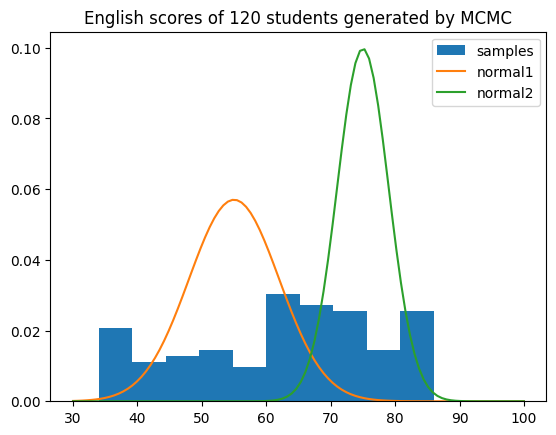

[55, 71, 43, 86, 76, 43, 69, 49, 63, 60, 63, 53, 85, 83, 64, 40, 68, 72, 52, 36, 53, 72, 86, 45, 37, 44, 67, 62, 64, 50, 38, 76, 74, 75, 70, 63, 67, 66, 42, 65, 62, 70, 50, 74, 52, 63, 82, 76, 71, 45, 72, 74, 36, 72, 76, 54, 81, 58, 78, 47, 39, 37, 63, 67, 86, 66, 86, 84, 72, 71, 83, 58, 66, 78, 53, 80, 85, 38, 75, 38, 40, 83, 46, 41, 63, 86, 58, 65, 34, 69, 63, 34, 69, 60, 38, 49, 60, 75, 80, 47, 56, 54, 66, 65, 82, 35, 68, 65, 68, 55, 47, 72, 74, 69, 84, 39, 79, 67, 86, 65]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 乱数のシードを設定
np.random.seed(22402)

# 正規分布のパラメータを設定
mu1 = 55 # 平均
sigma1 = 7 # 分散
mu2 = 75 # 平均
sigma2 = 4 # 分散

# マルコフ連鎖の初期値を設定
x0 = 55 # 初期値
n = 120 # サンプル数

# マルコフ連鎖の遷移確率を設定
p = 0.5 # どちらの正規分布からサンプリングするかの確率

# マルコフ連鎖のサンプリング
x = [x0] # サンプルのリスト
for i in range(n-1):
    # どちらの正規分布からサンプリングするかを決める
    if np.random.rand() < p:
        # 正規分布1からサンプリングする
        # x_next = np.random.normal(mu1, sigma1)
        x_next = np.random.randint(mu1-sigma1*3,mu1+sigma1*3)
    else:
        # 正規分布2からサンプリングする
        # x_next = np.random.normal(mu2, sigma2)
        x_next = np.random.randint(mu2-sigma2*3,mu2+sigma2*3)
    # サンプルのリストに追加する
    x.append(x_next)

# サンプルのヒストグラムを描画する
plt.hist(x, bins=10, density=True, label="samples")
# 正規分布の確率密度関数を描画する
x_range = np.linspace(30, 100, 100)
y1 = (1/np.sqrt(2*np.pi*sigma1**2))*np.exp(-((x_range-mu1)**2)/(2*sigma1**2))
y2 = (1/np.sqrt(2*np.pi*sigma2**2))*np.exp(-((x_range-mu2)**2)/(2*sigma2**2))
plt.plot(x_range, y1, label="normal1")
plt.plot(x_range, y2, label="normal2")
# グラフのタイトルと凡例を設定する
plt.title("English scores of 120 students generated by MCMC")
plt.legend()
# グラフを表示する
plt.show()
print(x)

- Bing Ai  COPILOTにさらに質問してみましょう：

```
ありがとうございます．上記の方法で試した結果，
生成された整数列Xが，[55, 71, 43, 86, 76, 43, 69, 49, 63, 60, 63, 53, 85, 83, 64, 40, 68, 72, 52, 36, 53, 72, 86, 45, 37, 44, 67, 62, 64, 50, 38, 76, 74, 75, 70, 63, 67, 66, 42, 65, 62, 70, 50, 74, 52, 63, 82, 76, 71, 45, 72, 74, 36, 72, 76, 54, 81, 58, 78, 47, 39, 37, 63, 67, 86, 66, 86, 84, 72, 71, 83, 58, 66, 78, 53, 80, 85, 38, 75, 38, 40, 83, 46, 41, 63, 86, 58, 65, 34, 69, 63, 34, 69, 60, 38, 49, 60, 75, 80, 47, 56, 54, 66, 65, 82, 35, 68, 65, 68, 55, 47, 72, 74, 69, 84, 39, 79, 67, 86, 65]　で，フラットな分布となりました．
そうすると，整数データの正規分布にするには，int(x_next = np.random.normal(mu1, sigma1)) とするほうがよいでしょうか？
```

## 生成AIの回答例と修正Pythonコード例：
-----
こんにちは、Copilotです。Pythonのコードに関する質問をありがとうございます。😊

あなたのコードはマルコフ連鎖モンテカルロ法（MCMC）を使って、二つの正規分布からサンプリングしたデータを生成するものですね。しかし、`np.random.randint`関数を使って整数に丸めてしまうと、正規分布の形が失われてしまいます。そのため、整数データの正規分布にするには、`np.random.normal`関数を使って実数のサンプリングを行い、その後に`int`関数で整数に変換する方がよいでしょう。例えば、次のように書き換えることができます。

```python
# マルコフ連鎖のサンプリング
x = [x0] # サンプルのリスト
for i in range(n-1):
    # どちらの正規分布からサンプリングするかを決める
    if np.random.rand() < p:
        # 正規分布1からサンプリングする
        x_next = int(np.random.normal(mu1, sigma1)) # 実数を整数に変換
    else:
        # 正規分布2からサンプリングする
        x_next = int(np.random.normal(mu2, sigma2)) # 実数を整数に変換
    # サンプルのリストに追加する
    x.append(x_next)
```

このようにすると、`x`のヒストグラムは正規分布に近い形になります。ただし、整数に丸めることでサンプリングの精度が低下することに注意してください。もし、実数のままでよければ、`int`関数を使わずに`np.random.normal`関数のままでよいです。
以上、ご参考になれば幸いです。Copilotとしてお役に立てれば嬉しいです。😊

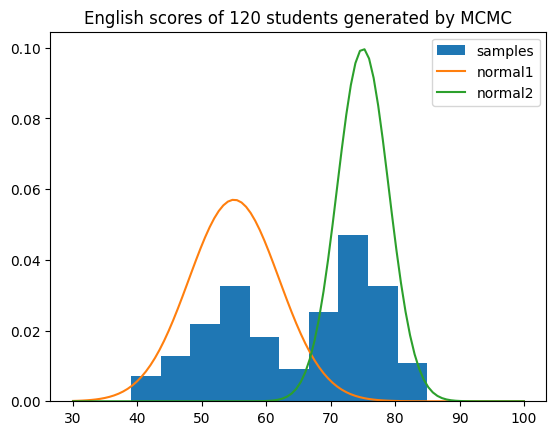

[55, 78, 71, 78, 42, 76, 49, 74, 79, 60, 48, 68, 65, 75, 55, 79, 52, 46, 73, 73, 61, 74, 48, 77, 67, 43, 71, 79, 81, 61, 56, 78, 51, 75, 74, 81, 72, 79, 76, 49, 77, 53, 73, 74, 63, 39, 84, 77, 55, 67, 71, 71, 52, 75, 59, 56, 76, 72, 56, 52, 54, 67, 70, 74, 84, 71, 55, 58, 57, 73, 66, 52, 77, 51, 49, 76, 46, 72, 46, 61, 74, 58, 53, 57, 75, 69, 46, 70, 55, 74, 74, 74, 40, 58, 65, 75, 85, 75, 57, 75, 72, 74, 58, 78, 56, 82, 67, 50, 63, 73, 54, 78, 71, 50, 55, 60, 79, 45, 54, 52]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 乱数のシードを設定
np.random.seed(22402)

# 正規分布のパラメータを設定
mu1 = 55 # 平均
sigma1 = 7 # 分散
mu2 = 75 # 平均
sigma2 = 4 # 分散

# マルコフ連鎖の初期値を設定
x0 = 55 # 初期値
n = 120 # サンプル数

# マルコフ連鎖の遷移確率を設定
p = 0.5 # どちらの正規分布からサンプリングするかの確率

# マルコフ連鎖のサンプリング
x = [x0] # サンプルのリスト
for i in range(n-1):
    # どちらの正規分布からサンプリングするかを決める
    if np.random.rand() < p:
        # 正規分布1からサンプリングする
        x_next = int(np.random.normal(mu1, sigma1))
        # x_next = np.random.randint(mu1-sigma1*3,mu1+sigma1*3)
    else:
        # 正規分布2からサンプリングする
        x_next = int(np.random.normal(mu2, sigma2))
        # x_next = np.random.randint(mu2-sigma2*3,mu2+sigma2*3)
    # サンプルのリストに追加する
    x.append(x_next)

# サンプルのヒストグラムを描画する
plt.hist(x, bins=10, density=True, label="samples")
# 正規分布の確率密度関数を描画する
x_range = np.linspace(30, 100, 100)
y1 = (1/np.sqrt(2*np.pi*sigma1**2))*np.exp(-((x_range-mu1)**2)/(2*sigma1**2))
y2 = (1/np.sqrt(2*np.pi*sigma2**2))*np.exp(-((x_range-mu2)**2)/(2*sigma2**2))
plt.plot(x_range, y1, label="normal1")
plt.plot(x_range, y2, label="normal2")
# グラフのタイトルと凡例を設定する
plt.title("English scores of 120 students generated by MCMC")
plt.legend()
# グラフを表示する
plt.show()
print(x)


------

## [神様モード]　ルールを決めて，データを創る
- 今までのストーリは，神様モード：
- データが生まれるルールを決めて，そのルールに見合ったデータを作り出す考え方
- 例えば，２種類の正規分布がルールで，それに従うデータを生成できた

------

## [人間モード] （立場を180度反転）　観測されたデータから，その背景にあるルールを推定する
- 観察されたデータは，神様しか知らないルールに基づいて，生まれてくる
- それがどんなルールなのか？　確率分布を推定する　（ベイズ推定）
- ベイズ・・・とは，いわゆる「条件付き確率」
- 「新たな事実が判明したのだから，それまでの定説を修正・アップデートする」
- これまで信じられていた確率があり，
- 新しい事実（データ）がわかったことで，
- それまでの定説（事前確率）を，適切に，修正・アップデートする（事後確率）考え方
- 観察されたデータ（事実）を根拠として，
- ２つの正規分布のパラメタ（平均と分散）を推論して「神のみぞ知るルール」を当てに行く


------

##  一旦，上記のコンテキストを忘れ,Bing AIに，新しいトピックとして，質問してみましょう．

-----

高校生120名の英語の成績が,100点満点で以下のリストで得られました：
[55, 78, 71, 78, 42, 76, 49, 74, 79, 60, 48, 68, 65, 75, 55, 79, 52, 46, 73, 73, 61, 74, 48, 77, 67, 43, 71, 79, 81, 61, 56, 78, 51, 75, 74, 81, 72, 79, 76, 49, 77, 53, 73, 74, 63, 39, 84, 77, 55, 67, 71, 71, 52, 75, 59, 56, 76, 72, 56, 52, 54, 67, 70, 74, 84, 71, 55, 58, 57, 73, 66, 52, 77, 51, 49, 76, 46, 72, 46, 61, 74, 58, 53, 57, 75, 69, 46, 70, 55, 74, 74, 74, 40, 58, 65, 75, 85, 75, 57, 75, 72, 74, 58, 78, 56, 82, 67, 50, 63, 73, 54, 78, 71, 50, 55, 60, 79, 45, 54, 52]
グラフの形から，２つの正規分布からこれらの成績が創出されていると推測しました．．
ベイズ推定，MCMC，PyMCなどを用いて2つの正規分布の推定とデータのサンプリングを行うPythonコードを教えて下さい．

-----

###  生成AIの回答，サンプルコード例
```
こんにちは、Copilotです。英語の成績のデータについて、ベイズ推定とMCMCを用いて2つの正規分布のパラメータを推定するPythonコードをお教えします。PyMCというライブラリを使うと、モデルの設定やサンプリングの実行が簡単にできます。

まず、必要なライブラリをインポートします。
```

```python
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

```

次に、成績のデータをnumpyの配列として定義します。

```python
scores = np.array([55, 78, 71, 78, 42, 76, 49, 74, 79, 60, 48, 68, 65, 75, 55, 79, 52, 46, 73, 73, 61, 74, 48, 77, 67, 43, 71, 79, 81, 61, 56, 78, 51, 75, 74, 81, 72, 79, 76, 49, 77, 53, 73, 74, 63, 39, 84, 77, 55, 67, 71, 71, 52, 75, 59, 56, 76, 72, 56, 52, 54, 67, 70, 74, 84, 71, 55, 58, 57, 73, 66, 52, 77, 51, 49, 76, 46, 72, 46, 61, 74, 58, 53, 57, 75, 69, 46, 70, 55, 74, 74, 74, 40, 58, 65, 75, 85, 75, 57, 75, 72, 74, 58, 78, 56, 82, 67, 50, 63, 73, 54, 78, 71, 50, 55, 60, 79, 45, 54, 52])
```

次に、モデルを設定します。2つの正規分布の混合分布を仮定すると、以下のようになります。

```python
# モデルの設定
model = pm.Model()
with model as model:
    # 混合比率の事前分布として一様分布を設定
    p = pm.Uniform('p', lower=0, upper=1)
    # 2つの正規分布の平均の事前分布として正規分布を設定
    mu1 = pm.Normal('mu1', mu=50, tau=0.01)
    mu2 = pm.Normal('mu2', mu=80, tau=0.01)
    # 2つの正規分布の標準偏差の事前分布として半正規分布を設定
    sigma1 = pm.HalfNormal('sigma1', tau=0.01)
    sigma2 = pm.HalfNormal('sigma2', tau=0.01)
    # 2つの正規分布の混合分布を設定
    mix = pm.NormalMixture('mix', w=[p, 1-p], mu=[mu1, mu2], tau=[1/sigma1**2, 1/sigma2**2], observed=scores)
```

最後に、MCMCを用いて事後分布からサンプリングを行います。ここでは、メトロポリス・ヘイスティングス法を使います。

```python
# MCMCの実行
with model as model:
    # メトロポリス・ヘイスティングス法を選択
    step = pm.Metropolis()
    # サンプリングを実行
    trace = pm.sample(10000, step=step, random_seed=1)
```

サンプリングが終わったら、結果を確認します。以下のコードで、各パラメータの事後分布のヒストグラムや要約統計量を表示できます。

```python
# 結果の確認
pm.traceplot(trace)
plt.show()
pm.summary(trace)
```

以上が、ベイズ推定とMCMCを用いて2つの正規分布のパラメータを推定するPythonコードです。ご参考になれば幸いです。


# 生成AIの作った上記コード例を実行します：

In [ ]:
!pip install pymc==5.7.2
!pip install arviz==0.15.1
!pip install scipy==1.10.1
!pip install numpy==1.23.5
!pip install pandas==1.5.3
!pip install matplotlib==3.7.1
!pip install seaborn==0.12.2
!pip install watermark
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor,aeppl,xarray,xarray_einstats

In [6]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import pytensor.tensor as pt

@np.vectorize
def model_line(x, u, nor, bg):
    ud = x - u
    f = pt.switch(ud <= 0, bg, nor*ud + bg)
    return f

scores = np.array([55, 78, 71, 78, 42, 76, 49, 74, 79, 60, 48, 68, 65, 75, 55, 79, 52, 46, 73, 73, 61, 74, 48, 77, 67, 43, 71, 79, 81, 61, 56, 78, 51, 75, 74, 81, 72, 79, 76, 49, 77, 53, 73, 74, 63, 39, 84, 77, 55, 67, 71, 71, 52, 75, 59, 56, 76, 72, 56, 52, 54, 67, 70, 74, 84, 71, 55, 58, 57, 73, 66, 52, 77, 51, 49, 76, 46, 72, 46, 61, 74, 58, 53, 57, 75, 69, 46, 70, 55, 74, 74, 74, 40, 58, 65, 75, 85, 75, 57, 75, 72, 74, 58, 78, 56, 82, 67, 50, 63, 73, 54, 78, 71, 50, 55, 60, 79, 45, 54, 52])

# モデルの設定
model = pm.Model()
with model as model:
    # 混合比率の事前分布として一様分布を設定
    p = pm.Uniform('p', lower=0, upper=1)
    # 2つの正規分布の平均の事前分布として正規分布を設定
    mu1 = pm.Normal('mu1', mu=50, tau=0.01)
    mu2 = pm.Normal('mu2', mu=80, tau=0.01)
    # 2つの正規分布の標準偏差の事前分布として半正規分布を設定
    sigma1 = pm.HalfNormal('sigma1', tau=0.01)
    sigma2 = pm.HalfNormal('sigma2', tau=0.01)
    # 2つの正規分布の混合分布を設定
    # mix = pm.NormalMixture('mix', w=[p, 1-p], mu=[mu1, mu2], tau=[1/sigma1**2, 1/sigma2**2], observed=scores)
    # w=[p, 1-p]をpt.switch(pt.lt(p, 0.5), [p, 1-p], [1-p, p])に変更
    # w=[p, 1-p]をmodel_line(p, 0.5, -1, 1)に変更
    mix = pm.NormalMixture('mix',
                           w=model_line(p, 0.5, -1, 1),
                           mu=[mu1, mu2],
                           tau=[1/sigma1**2, 1/sigma2**2],
                           observed=scores)
# TypeError: Variables do not support boolean operations.


TypeError: Variables do not support boolean operations.

## 生成AIに繰り返し質問して，エラーが解消しない時

- 生成AIは優秀なアシスタントでありえますが，万能ではありません
- ピント外れの回答も，堂々巡りも，**ハルシネーション**（幻覚と言われる「事実にもとづかない情報，実在しない情報を生成する現象」）も少なからずあります
- 生成AIへの依存・盲信(鵜呑み)は要注意，というより厳禁です
- 自分の頭で考えて，判断することが軸足です
- あくまでも自分自身がプレイヤーであり，
- ゴルフの名キャディのように，良いヒントやアドバイスを提供してくれる心強いアシスタント
- と捉えれば，ヒントやアドバイスを，判断材料としてしっかり消化吸収して
- 有限の時間，プレイに最大集中することです
- 生成AIのアドバイスに限界を感じる前に，
- 速やかに自分自身で考えて，問題解決に全集中しましょう

## PyMCの公式ドキュメントを参考に，自己解決モードにチェンジします

https://www.pymc.io/projects/examples/en/latest/mixture_models/gaussian_mixture_model.html

https://pytensor.readthedocs.io/en/latest/tutorial/examples.html


In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor,aeppl,xarray,xarray_einstats

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sat Feb 17 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

pytensor       : 2.14.2
aeppl          : not installed
xarray         : 2023.7.0
xarray_einstats: 0.7.0

pymc      : 5.7.2
numpy     : 1.23.5
matplotlib: 3.7.1
pytensor  : 2.14.2

Watermark: 2.4.3



In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm

from scipy.stats import norm
from xarray_einstats.stats import XrContinuousRV

In [9]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

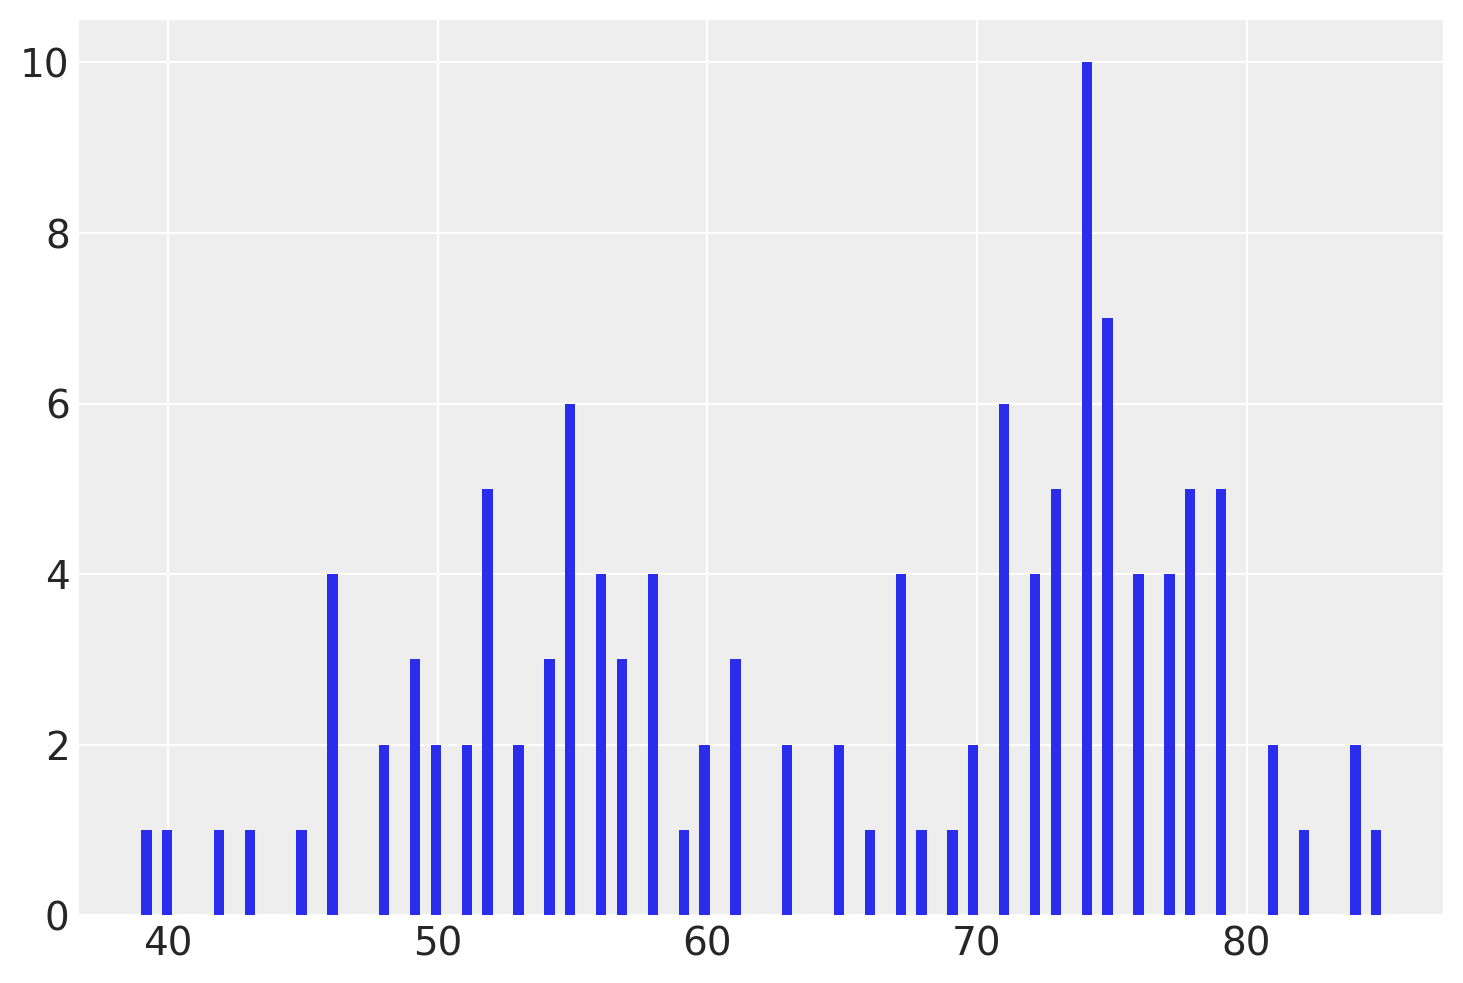

In [10]:
plt.hist(x,len(x));

In [11]:
k = 2
n = len(x) # 120

model1 = pm.Model()
with model1:
  X_data = pm.ConstantData('X_data',x)
  p = pm.Uniform('p',lower=0.0,upper=1.0)

  s = pm.Bernoulli('s',p=p,shape=n)
  mus = pm.Normal('mus',mu=50.0,sigma=10.0,shape=k)

  taus = pm.HalfNormal('taus',sigma=10.0,shape=k)
  sigmas = pm.Deterministic('sigmas',1/pm.math.sqrt(taus))

  mu = pm.Deterministic('mu',mus[s])
  tau = pm.Deterministic('tau',taus[s])

  X_obs = pm.Normal('X_obs',mu=mu,tau=tau,observed = X_data)


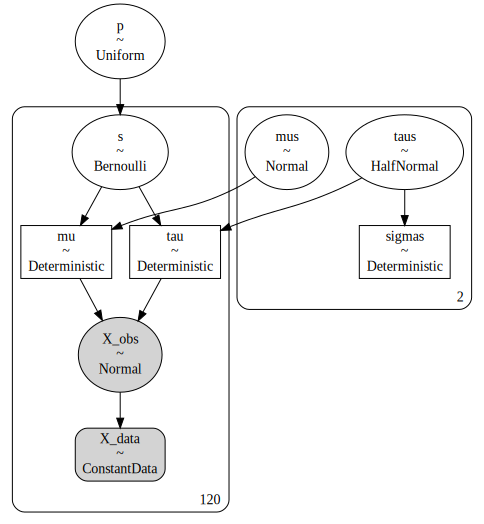

In [12]:
g = pm.model_to_graphviz(model1)
display(g)

In [13]:
with model1:
  idata1 = pm.sample(chains=1,draws=2000,target_accept=0.99,random_seed=224219)


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
<ipython-input-14-c4d994fbcf35>:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


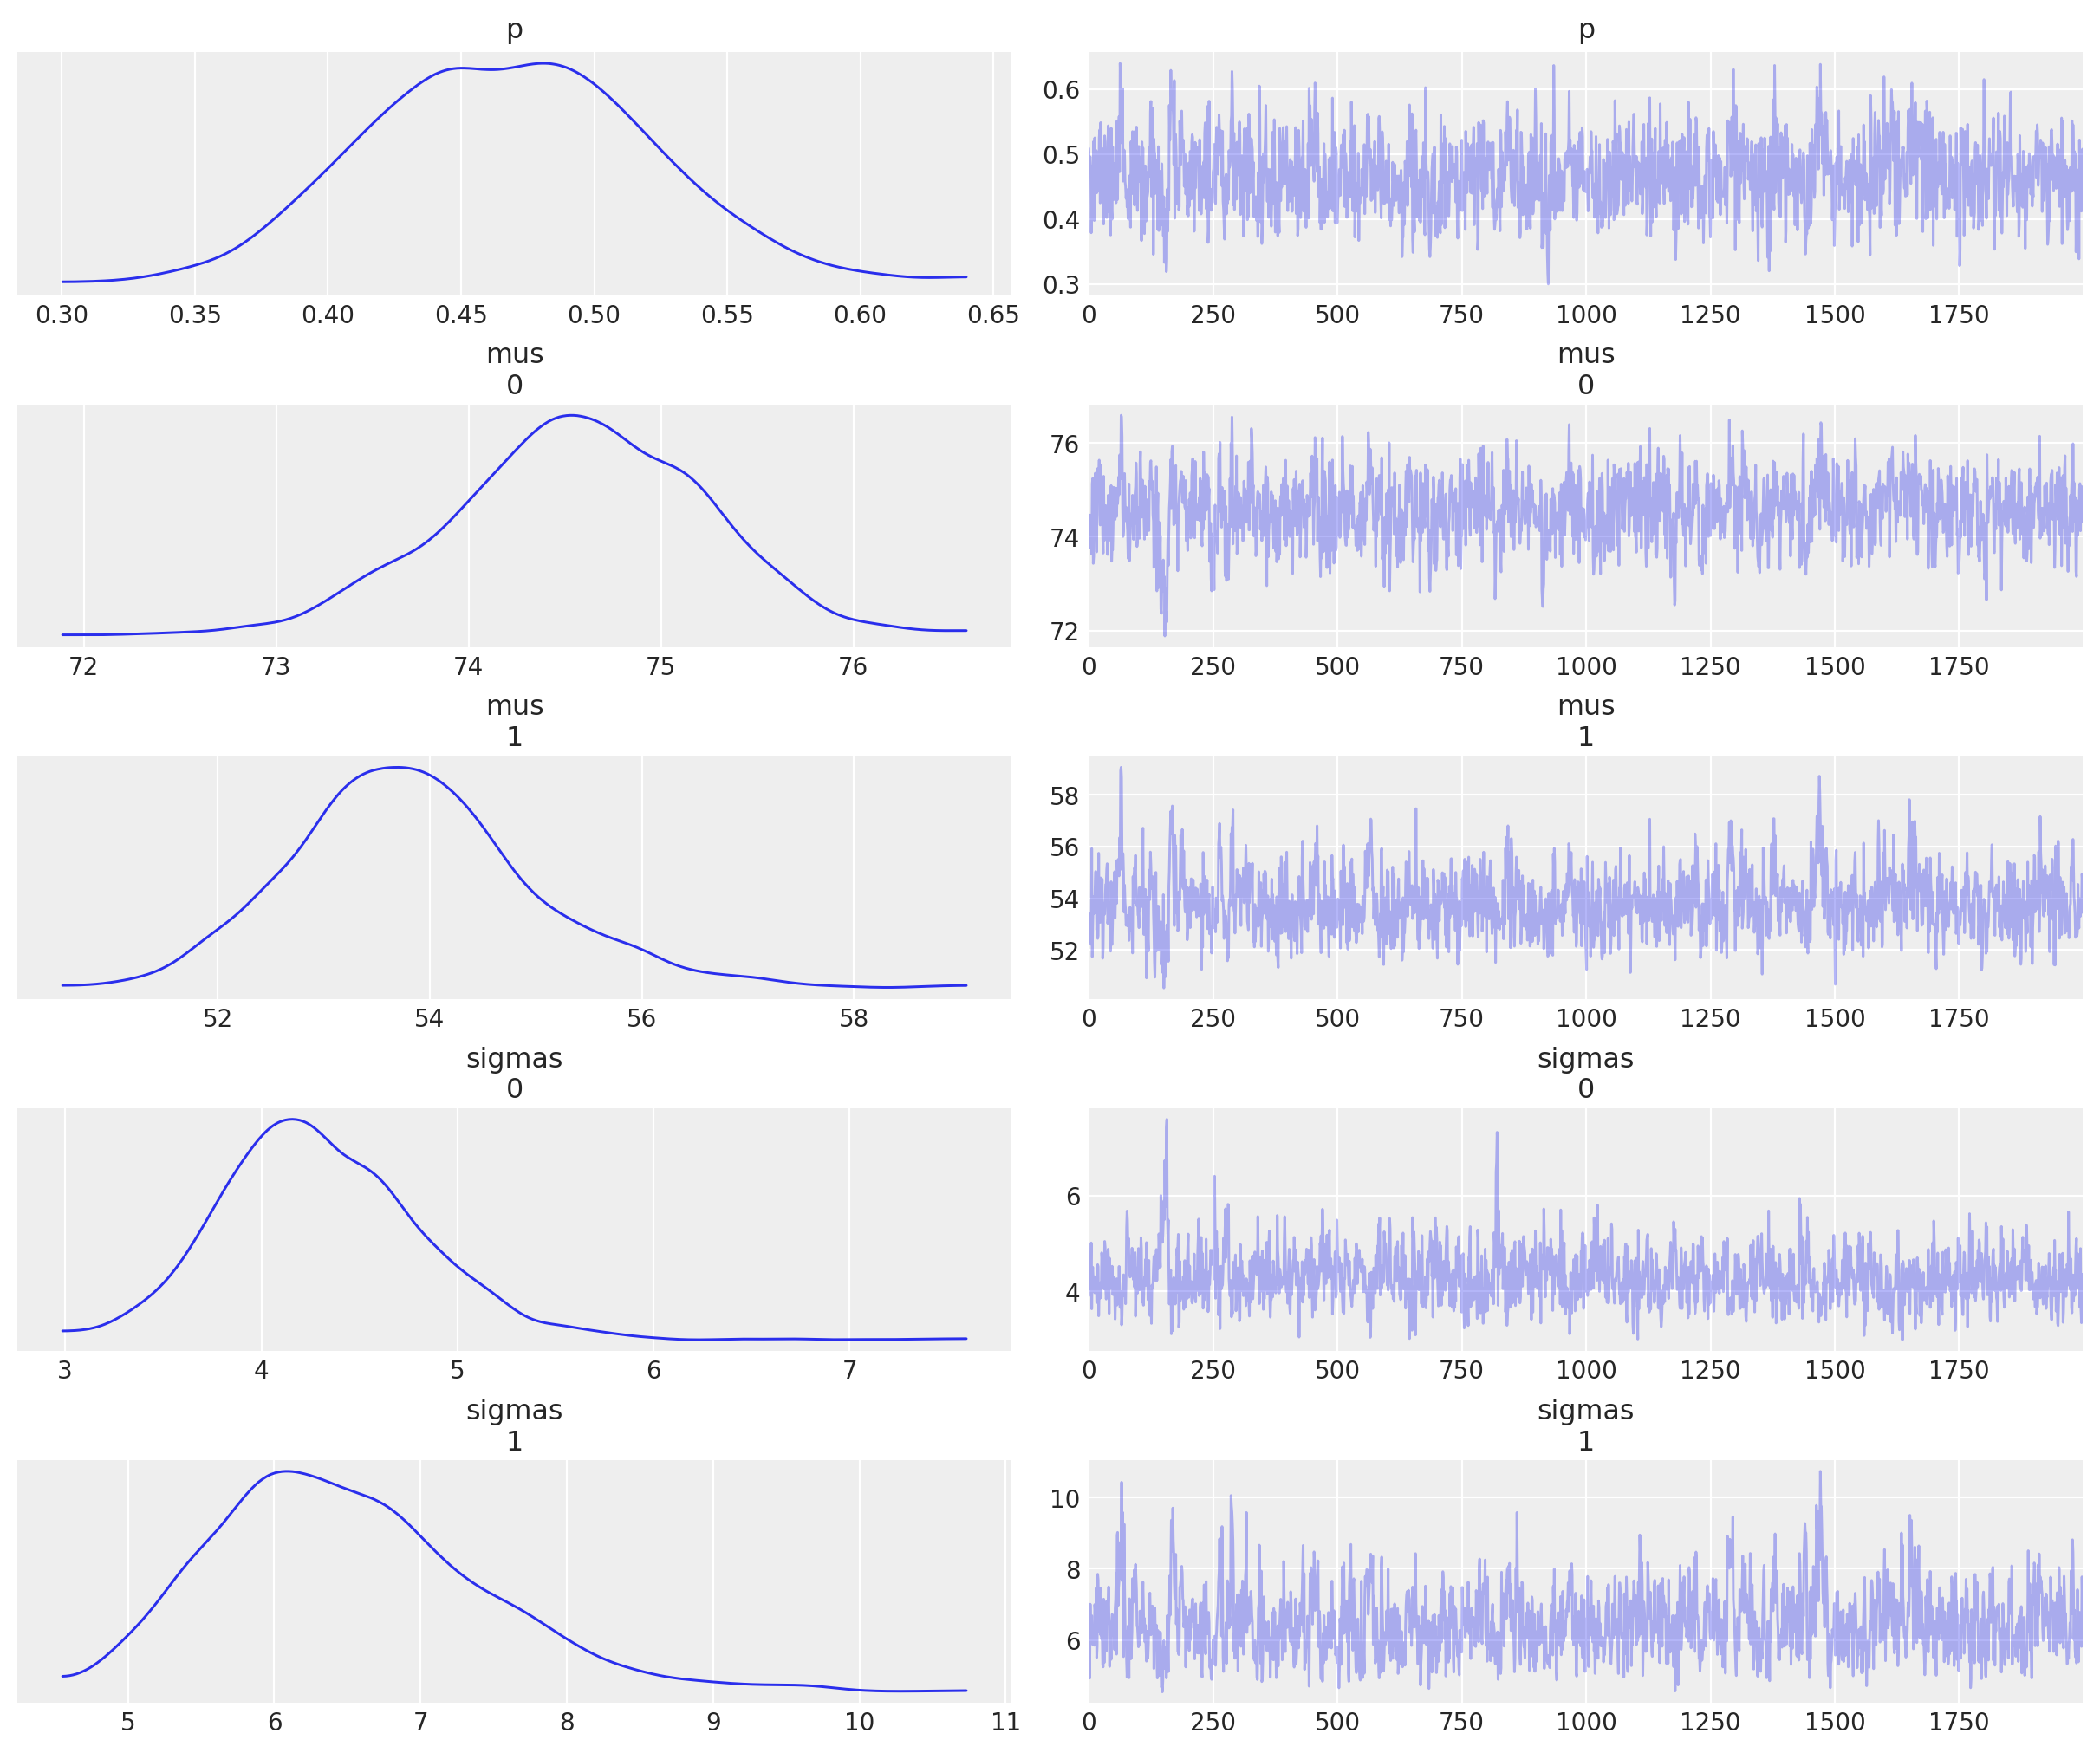

In [14]:
plt.rcParams['figure.figsize']=(3,3)
az.plot_trace(idata1,var_names=['p','mus','sigmas'],compact=False)
plt.tight_layout()

<ipython-input-15-bf2d21f6ffea>:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


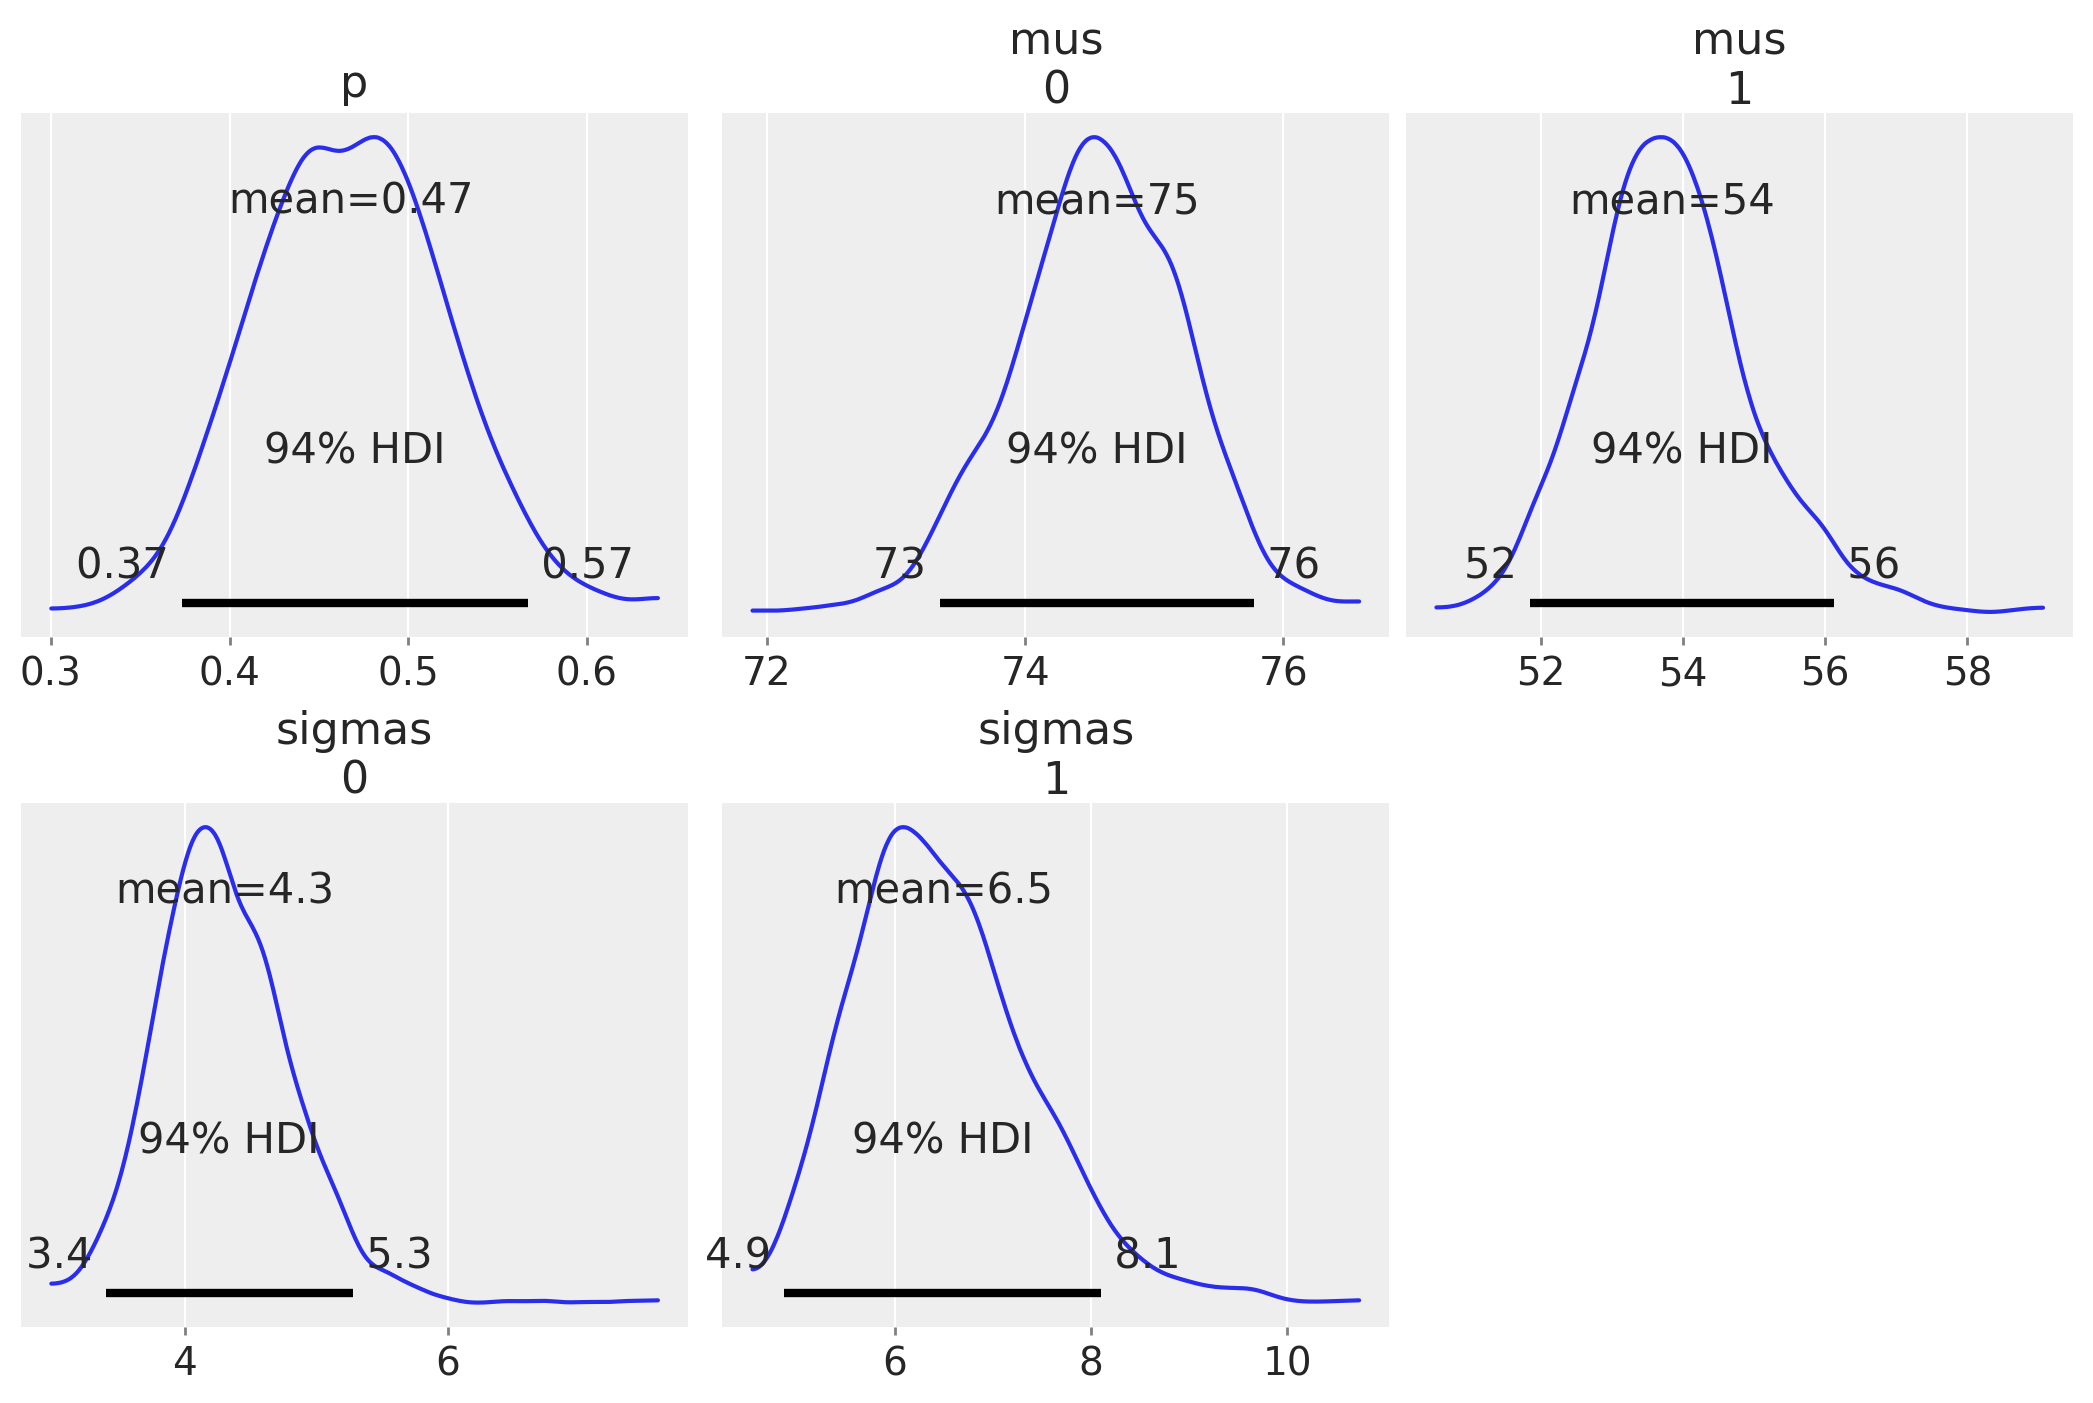

In [15]:
az.plot_posterior(idata1,var_names=['p','mus','sigmas'])
plt.tight_layout()

In [16]:
summary1 = az.summary(idata1,var_names=['p','mus','sigmas'])
display(summary1)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.468,0.053,0.373,0.567,0.002,0.002,604.0,685.0,NaN
mus[0],74.558,0.664,73.339,75.770,0.029,0.021,539.0,553.0,NaN
mus[1],53.844,1.152,51.849,56.126,0.055,0.039,474.0,494.0,NaN
sigmas[0],4.306,0.522,3.401,5.275,0.025,0.018,493.0,575.0,NaN
sigmas[1],6.504,0.918,4.876,8.099,0.046,0.033,434.0,423.0,NaN


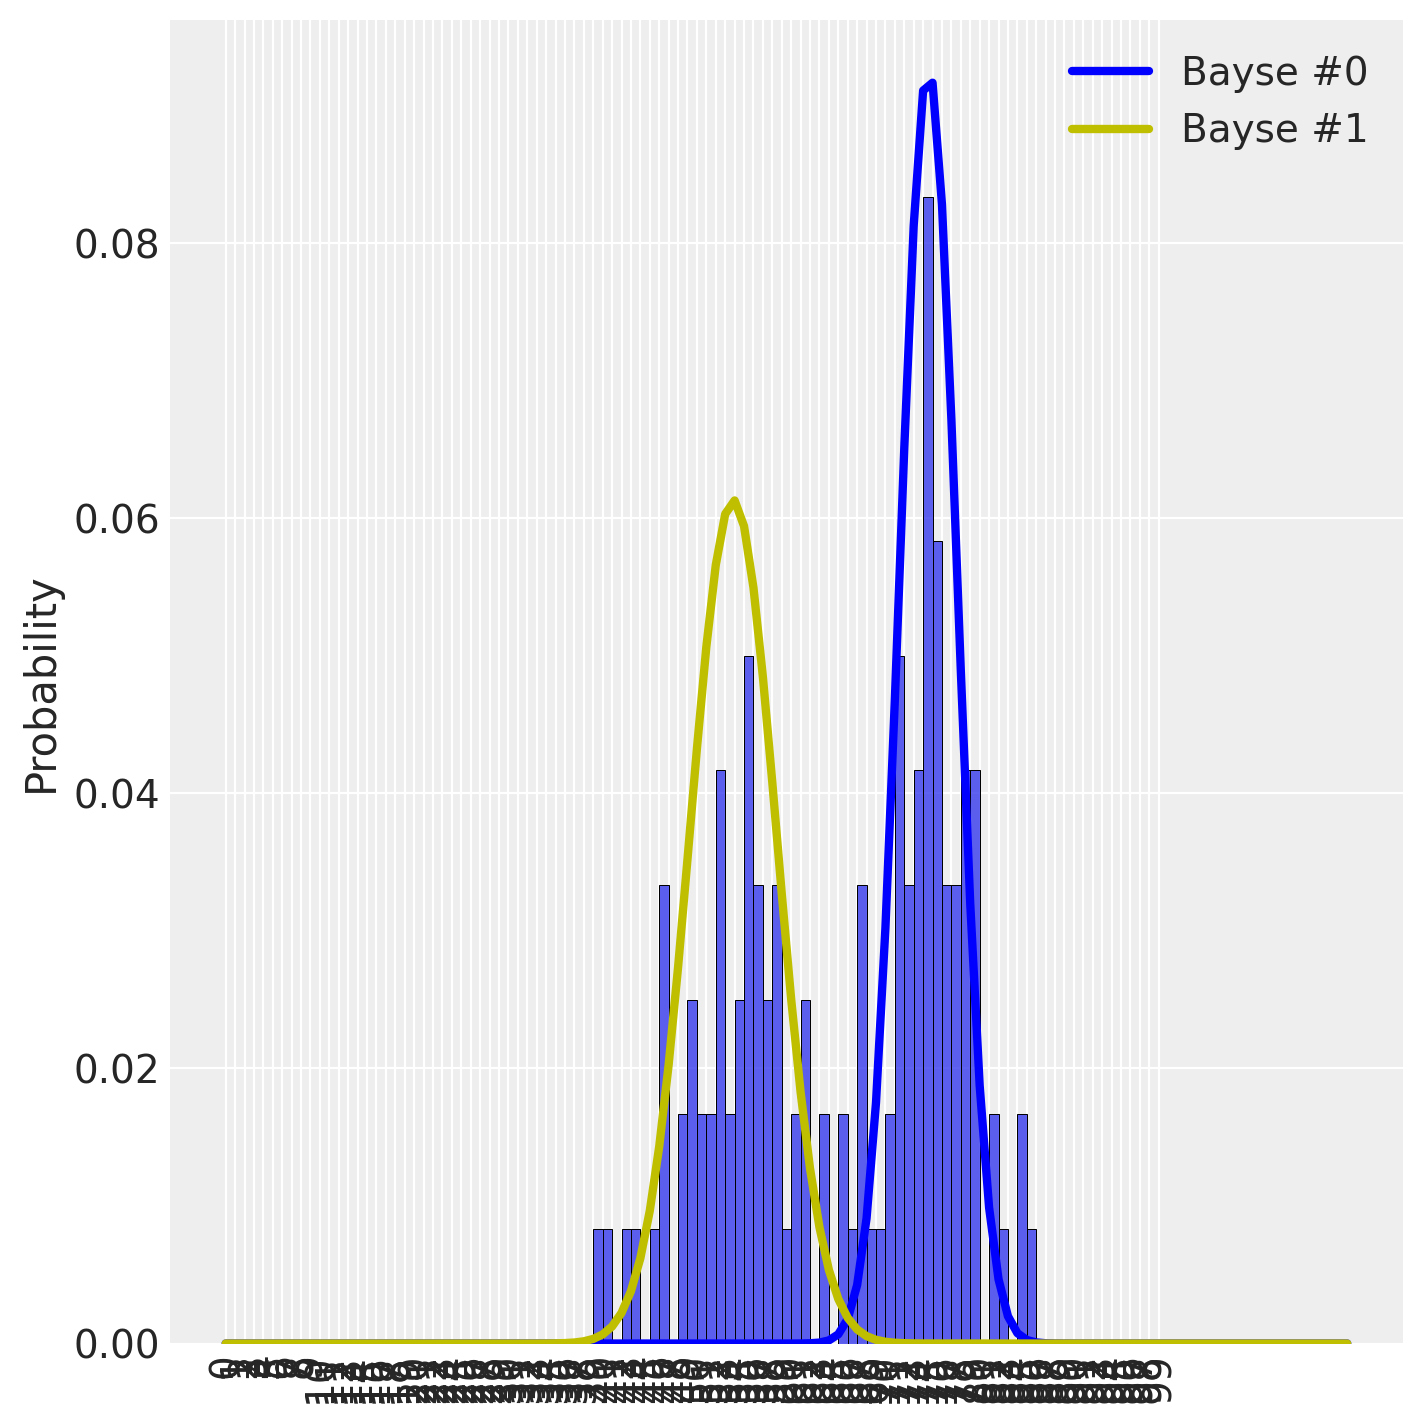

In [18]:
import seaborn as sns
def norm(x,m,s):
  return np.exp(-((x-m)/s)**2) / (np.sqrt(2 * np.pi) * s)

def over_plot():

  mean = summary1['mean']
  mean_m0,mean_m1 = mean['mus[0]'],mean['mus[1]']
  mean_s0,mean_s1 = mean['sigmas[0]'],mean['sigmas[1]']

  X = np.arange(0,120)
  y0 = norm(X,mean_m0,mean_s0)
  y1 = norm(X,mean_m1,mean_s1)
  delta = 1
  bins = np.arange(0,100,delta)
  plt.rcParams['figure.figsize'] = (7,7)
  fig,ax = plt.subplots()
  sns.histplot(data=x,bins=bins,ax=ax,stat='probability')
  ax.plot(X,y0,c='b',lw=3,label='Bayse #0')
  ax.plot(X,y1,c='y',lw=3,label='Bayse #1')
  ax.set_xticks(bins)
  ax.xaxis.set_tick_params(rotation=90)
  plt.legend()

over_plot()


##  「神のみぞ知る」ルールを推定した結果
-  1つ目の正規分布は，(平均 $\mu_0$, 分散 $\sigma_0$) == (74.668,4.3)
-  もう一つの正規分布は，(平均 $\mu_1$, 分散 $\sigma_1$) == (53.844,6.5)
と推定された．
- 神モードで，生成AIに依頼した設定を確認：
```python
# 正規分布のパラメータを設定
mu1 = 55 # 平均
sigma1 = 7 # 分散
mu2 = 75 # 平均
sigma2 = 4 # 分散
```
- 一連の往復体験が何を意味するか？
- 演繹： すでに知られたルールがあって，そのルールに従うデータ（具体例）を作る
- 帰納的推論:  観察された事実（データ）から，その背景にある一般ルールを推定する
- 機械学習のパラメータ推定: データからルールを学習し，分類・回帰・予測する
- サンプリングによるデータ生成: 確率分布（ルール）に従うランダムデータを生成する手法
- テストの点数のような1次元データはモンテカルロ法が使える
- 機械学習で扱う特徴ベクトルは,普通に数100次元データ
- 数10〜数100次元空間では,ランダムヒット率が極めて低くなる
- そこでMCMC：マルコフ連鎖モンテカルロ法，メトロポリスヘイスティングス法，ギブスボルツマンサンプリング・・・につながる


## 以上，
## 生成AIを副操縦士として，
## データサンプリングとベイズ推定の往復が何を意味するか？
## データ分析，機械学習，サンプリングの関係性について，
## Pythonで「やればできる」体験しました


-------
以下，参考

###  ベイズ推定がうまく働かなかったケース

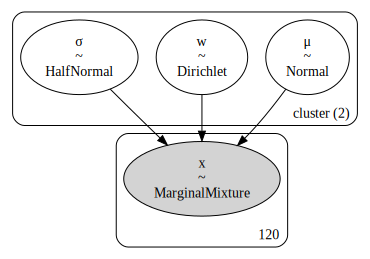

In [19]:
k = 2  # numbers of cluster
with pm.Model(coords={"cluster": range(k)}) as model:
    μ = pm.Normal(
        "μ",
        mu=0,
        sigma=5,
        transform=pm.distributions.transforms.univariate_ordered,
        initval=[40,50],
        dims="cluster",
    )
    σ = pm.HalfNormal("σ", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", np.ones(k), dims="cluster")
    pm.NormalMixture("x", w=weights, mu=μ, sigma=σ, observed=x)

pm.model_to_graphviz(model)

In [20]:
with model:
    idata = pm.sample()

<ipython-input-21-fa850481cfb3>:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


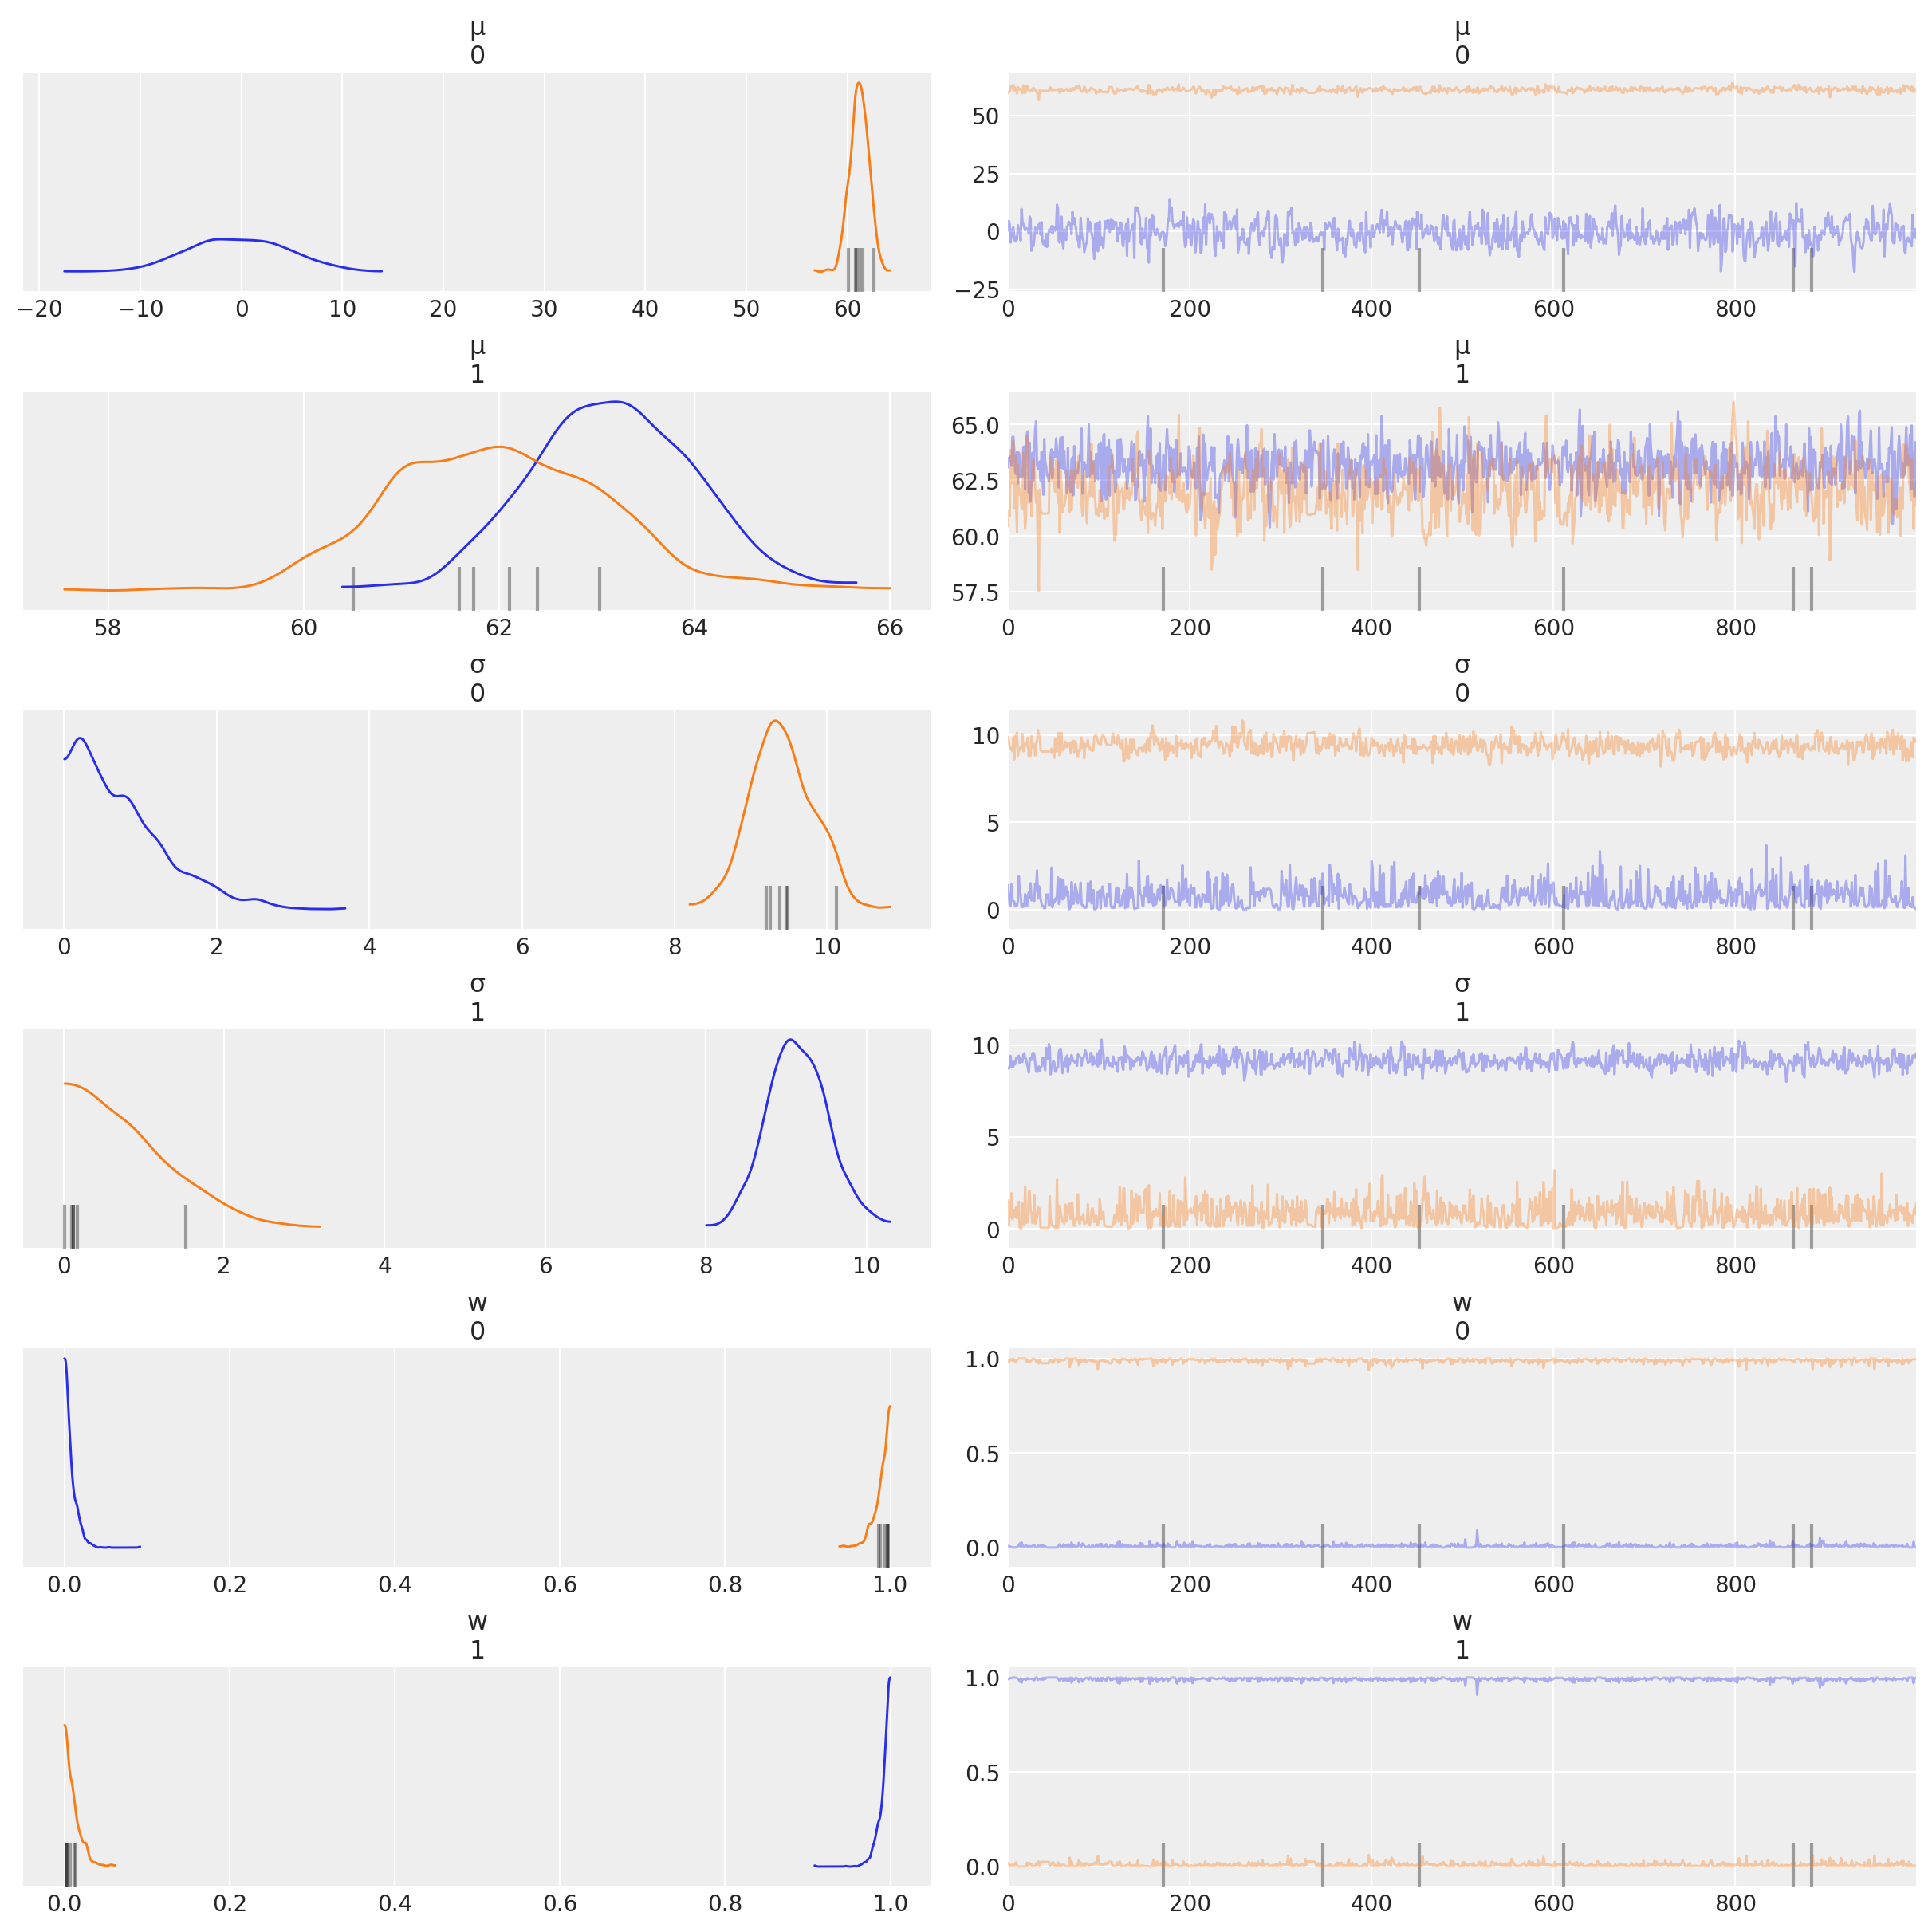

In [21]:
az.plot_trace(idata,compact=False)
plt.tight_layout()

In [22]:
# ax = az.plot_posterior(idata)
summary = az.summary(idata)
display(summary)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],30.400,30.981,-6.458,63.013,21.704,18.436,3.0,88.0,1.83
μ[1],62.579,1.150,60.306,64.563,0.426,0.314,7.0,121.0,1.21
σ[0],5.094,4.344,0.008,9.934,3.042,2.566,3.0,112.0,1.83
σ[1],4.986,4.190,0.032,9.590,2.934,2.475,3.0,98.0,1.83
w[0],0.499,0.491,0.000,0.999,0.346,0.292,3.0,64.0,1.83
w[1],0.501,0.491,0.001,1.000,0.346,0.292,3.0,64.0,1.83


In [23]:
idata.posterior
#x_sampled = idata['prior']['x'].values
#print(x_sampled)


<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000, cluster: 2)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * cluster  (cluster) int64 0 1
Data variables:
    μ        (chain, draw, cluster) float64 0.3133 63.07 4.502 ... 61.15 62.49
    σ        (chain, draw, cluster) float64 1.41 8.747 0.7936 ... 9.803 1.44
    w        (chain, draw, cluster) float64 0.009179 0.9908 ... 0.9959 0.004072
Attributes:
    created_at:                 2024-02-17T05:58:14.401048
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.7.2
    sampling_time:              42.80881690979004
    tuning_steps:               1000

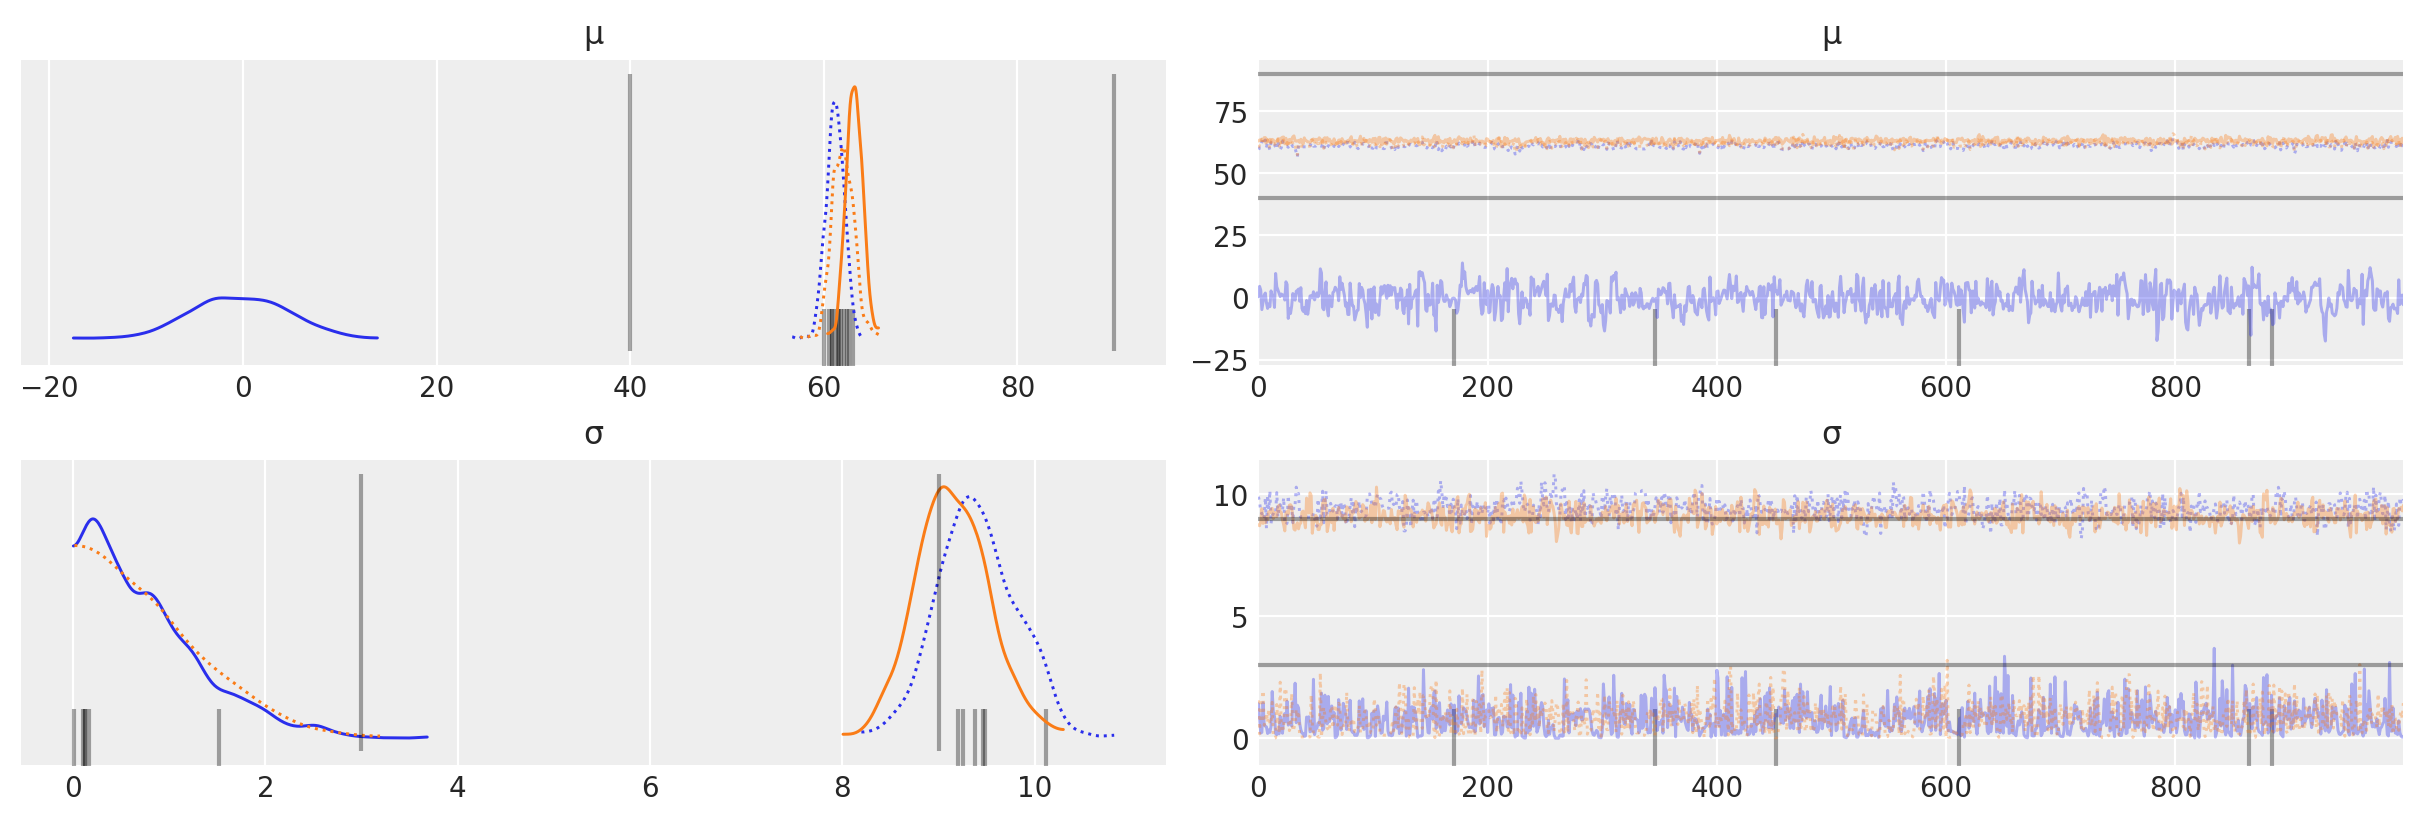

In [24]:
centers = np.array([40, 90])
sds = np.array([3, 9])
az.plot_trace(idata, var_names=["μ", "σ"], lines=[("μ", {}, [centers]), ("σ", {}, [sds])]);

In [25]:
xi = np.linspace(30, 100)
post = idata.posterior
pdf_components = XrContinuousRV(norm, post["μ"], post["σ"]).pdf(xi) * post["w"]
pdf = pdf_components.sum("cluster")

fig, ax = plt.subplots(3, 1, figsize=(7, 8), sharex=True)
# empirical histogram
ax[0].hist(x, len(x))
ax[0].set(title="Data", xlabel="x", ylabel="Frequency")
# pdf
pdf_components.mean(dim=["chain", "draw"]).sum("cluster").plot.line(ax=ax[1])
ax[1].set(title="PDF", xlabel="x", ylabel="Probability\ndensity")
# plot group membership probabilities
(pdf_components / pdf).mean(dim=["chain", "draw"]).plot.line(hue="cluster", ax=ax[2])
ax[2].set(title="Group membership", xlabel="x", ylabel="Probability");

AttributeError: 'function' object has no attribute 'pdf'

In [26]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor,aeppl,xarray,xarray_einstats

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sat Feb 17 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

pytensor       : 2.14.2
aeppl          : not installed
xarray         : 2023.7.0
xarray_einstats: 0.7.0

pymc      : 5.7.2
numpy     : 1.23.5
pandas    : 1.5.3
matplotlib: 3.7.1
seaborn   : 0.12.2
arviz     : 0.15.1
pytensor  : 2.14.2

Watermark: 2.4.3

